JUICE RPWI HK Plot

2024-04-22 F. Tsuchiya

In [101]:
# The latest CDF library https://spdf.gsfc.nasa.gov/pub/software/cdf/dist/latest/
from spacepy import pycdf
import os
os.environ['CDF_LIB'] = 'C:/Program Files/CDF_Distribution/cdf39_0-dist/lib'

Libs

In [128]:
import glob
import spacepy.pycdf

class hk_struct:
    pass


def juice_read_cdfs(date_str, label, ver_str="01", base_dir="/db/JUICE/juice/datasets/"):

    yr_str = date_str[0:4]
    mn_str = date_str[4:6]
    dy_str = date_str[6:8]
    search_path = base_dir+yr_str+'/'+mn_str+'/'+dy_str + \
        '/JUICE_LU_RPWI-PPTD-'+label+'_'+date_str+'T??????_V'+ver_str+'.cdf'
    
    fname = glob.glob(search_path)
    if len(fname) > 0:
        err=0
        ret = spacepy.pycdf.concatCDF([
            spacepy.pycdf.CDF(f) for f in glob.glob(search_path)])
    else:
        err=1
        ret=0

    return ret, err


def juice_gethk_hf(data):

    hk = hk_struct()
    hk.epoch      = data['Epoch'][...]
    hk.temp_adc_a = data['LWT03337_CALIBRATED'][...]
    hk.temp_adc_b = data['LWT03339_CALIBRATED'][...]
    hk.temp_adc_c = data['LWT0333B_CALIBRATED'][...]

    return hk


def juice_gethk_dpu(data):

    hk = hk_struct()
    hk.epoch     = data['Epoch'][...]
    hk.dpu_temp  = data['LWT03437_CALIBRATED'][...]
    hk.lvps_temp = data['LWT03438_CALIBRATED'][...]
    hk.lp_temp   = data['LWT03439_CALIBRATED'][...]
    hk.lf_temp   = data['LWT0343A_CALIBRATED'][...]
    hk.hf_temp   = data['LWT0343B_CALIBRATED'][...]
    hk.scm_temp  = data['LWT0343C_CALIBRATED'][...]

    return hk


def juice_gethk_lvps(data):

    hk = hk_struct()
    hk.epoch = data['Epoch'][...]
    hk.vol_hf_33 = data['LWT03358_CALIBRATED'][...]
    hk.vol_hf_85 = data['LWT03359_CALIBRATED'][...]
    hk.cur_hf_33 = data['LWT03362_CALIBRATED'][...]
    hk.cur_hf_85 = data['LWT03363_CALIBRATED'][...]
    hk.hf_on_off = data['LWT03372'][...]

    return hk


User program

(1) read CDF files

In [140]:
date='20230420'
base_dir = 'C:/share/Linux/doc/juice/datasets/'
work_dir = 'C:/share/Linux/doc/juice/ql/'

data_hf, err_hf = juice_read_cdfs(date, 'LWYHK00032', base_dir=base_dir)
data_dpu, err_dpu = juice_read_cdfs(date, 'LWYHK00064', base_dir=base_dir)
data_lvps, err_lvps = juice_read_cdfs(date, 'LWYHK00080', base_dir=base_dir)

if err_hf == 0: 
    hk_hf   = juice_gethk_hf(data_hf)
if err_dpu == 0:
    hk_dpu = juice_gethk_dpu(data_dpu)
if err_lvps == 0:
    hk_lvps = juice_gethk_lvps(data_lvps)


(2) Plot HK values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


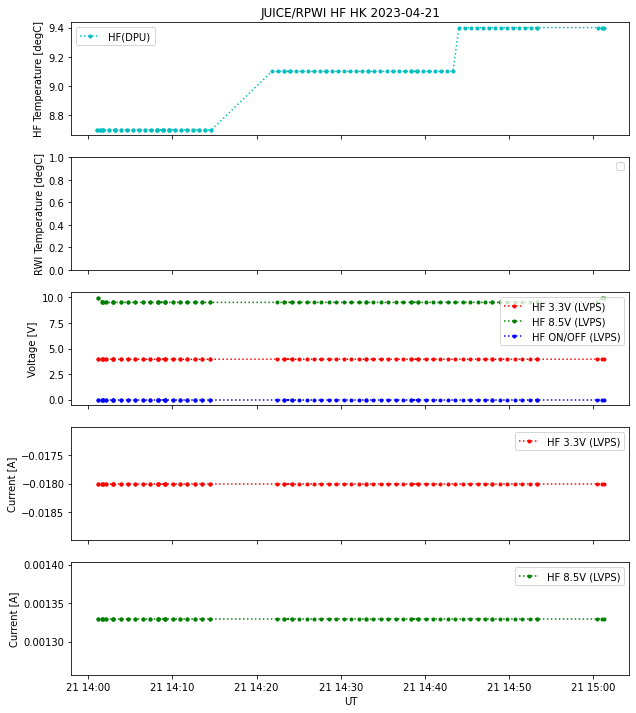

In [141]:
import matplotlib.pyplot as plt
import numpy as np

title_label = 'JUICE/RPWI HF HK ' + date[0:4] + '-' + date[4:6] + '-' + date[6:8]
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(
    5, figsize=(10.0, 12.0), sharex=True)

if err_hf == 0:
    temp_lim = [-150.0, 100.0]
    temp_adc_a = np.where((hk_hf.temp_adc_a < temp_lim[0]) |
                          (hk_hf.temp_adc_a > temp_lim[1]), np.nan, hk_hf.temp_adc_a)
    temp_adc_b = np.where((hk_hf.temp_adc_b < temp_lim[0]) |
                          (hk_hf.temp_adc_b > temp_lim[1]), np.nan, hk_hf.temp_adc_b)
    temp_adc_c = np.where((hk_hf.temp_adc_c < temp_lim[0]) |
                          (hk_hf.temp_adc_c > temp_lim[1]), np.nan, hk_hf.temp_adc_c)

#-----------------------------------------------------------------
if err_hf == 0:
    ax1.plot(hk_hf.epoch, temp_adc_c, '.:b', label='HF(HF)')
if err_dpu == 0:
    ax1.plot(hk_dpu.epoch, hk_dpu.hf_temp, '.:c', label='HF(DPU)')

ax1.set_ylabel('HF Temperature [degC]')
ax1.legend()
ax1.set_title(title_label)

#-----------------------------------------------------------------
if err_hf == 0:
    ax2.plot(hk_hf.epoch, temp_adc_a, '.:b', label='RWI A (HF)')
    ax2.plot(hk_hf.epoch, temp_adc_b, '.:c', label='RWI B (HF)')

ax2.set_ylabel('RWI Temperature [degC]')
ax2.legend()

#-----------------------------------------------------------------
if err_lvps == 0:
    ax3.plot(hk_lvps.epoch, hk_lvps.vol_hf_33, '.:r', label='HF 3.3V (LVPS)')
    ax3.plot(hk_lvps.epoch, hk_lvps.vol_hf_85, '.:g', label='HF 8.5V (LVPS)')
    ax3.plot(hk_lvps.epoch, hk_lvps.hf_on_off, '.:b', label='HF ON/OFF (LVPS)')

ax3.set_ylabel('Voltage [V]')
ax3.legend()

#-----------------------------------------------------------------
if err_lvps == 0:
    ax4.plot(hk_lvps.epoch, hk_lvps.cur_hf_33, '.:r', label='HF 3.3V (LVPS)')

ax4.set_ylabel('Current [A]')
ax4.legend()

#-----------------------------------------------------------------
if err_lvps == 0:
    ax5.plot(hk_lvps.epoch, hk_lvps.cur_hf_85, '.:g', label='HF 8.5V (LVPS)')

ax5.set_xlabel('UT')
ax5.set_ylabel('Current [A]')
ax5.legend()

png_fname = work_dir+'RPWI_HF_HK_'+date+'.png'
fig.savefig(png_fname)
